In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

url = 'http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/features/eye_tracking/eye_tracking.gzip.parquet'

df = pd.read_parquet(url)

#columns = ['frame_index', 'progress', 'eye_x', 'eye_y']

# set column names
# df.columns = columns

df

,frame_index,progress,eye_x,eye_y
0,0,0.000022,0.316257,0.321542
1,4,0.080189,0.402775,0.391937
2,12,0.200466,0.417769,0.381991
3,16,0.283132,0.440380,0.369485
4,24,0.403375,0.451371,0.327616
5,29,0.483554,0.486777,0.288344
6,36,0.608733,0.534303,0.225137
7,43,0.728980,0.563773,0.203371
8,48,0.809124,0.607702,0.240022
9,55,0.929355,0.653858,0.298119


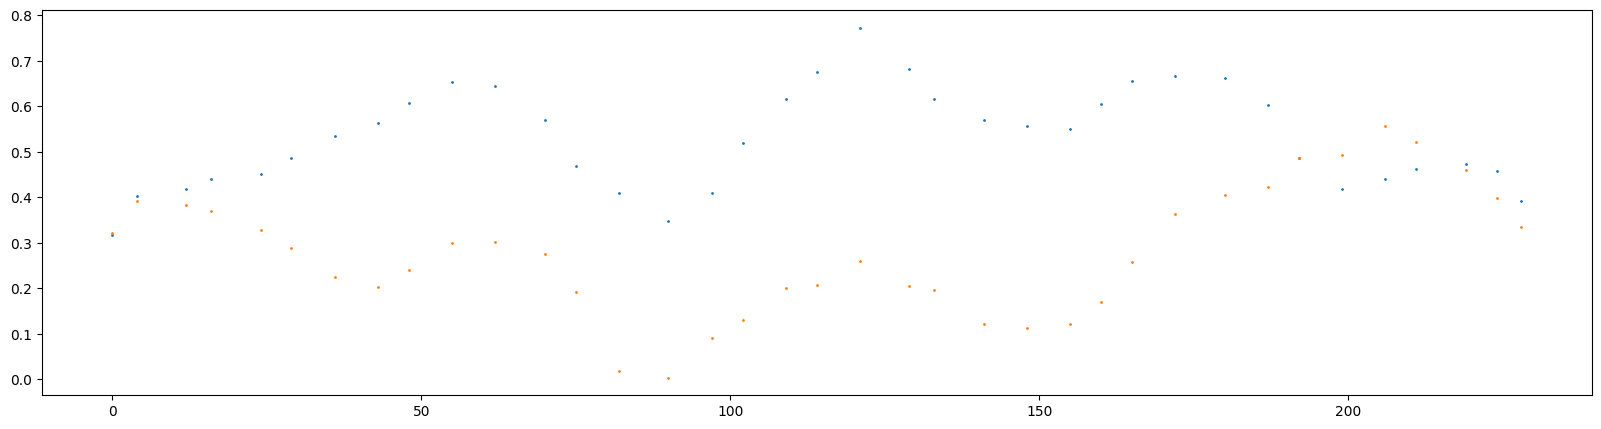

In [5]:
plt.figure(figsize=(20,5))
plt.scatter(df['frame_index'], df['eye_x'], s=1)
plt.scatter(df['frame_index'], df['eye_y'], s=1)

In [6]:
url = 'http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/features/preprocess/preprocess.gzip.parquet'
pdf = pd.read_parquet(url)

pdf

# url = 'http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/features/preprocess/preprocess.gzip.parquet'
# odf = pd.read_parquet(url)

,frame_index,blur,total_objects,median_motion,std_motion,red,orange,yellow,green,blue,purple,white,black,brown
0,0.0,166.639314,128,NaN,NaN,0.004964,0.032175,0.013519,0.003435,0.077371,0.000050,0.037876,0.039811,0.343644
1,1.0,137.255737,129,-3.811660e-12,5.773012,0.005425,0.031148,0.013262,0.003967,0.078179,0.000034,0.037785,0.040975,0.346251
2,2.0,129.215376,143,4.419556e-03,5.275668,0.005206,0.030064,0.012403,0.004012,0.076630,0.000049,0.043622,0.041968,0.341993
3,3.0,120.201082,167,-5.203282e-14,4.969699,0.005676,0.029279,0.012569,0.004323,0.078527,0.000081,0.044171,0.043968,0.342615
4,4.0,115.396284,150,-9.819682e-13,4.699063,0.005380,0.026098,0.013278,0.004598,0.080849,0.000065,0.045038,0.046263,0.341912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4048,4048.0,27.454589,86,-3.692427e-04,4.255781,0.049126,0.266886,0.011898,0.025254,0.203703,0.000325,0.014895,0.004985,0.473459
4049,4049.0,26.836729,71,1.362402e-04,3.779636,0.053435,0.258299,0.020805,0.018349,0.231993,0.000044,0.018138,0.004850,0.425330
4050,4050.0,27.206008,56,1.343790e-03,3.423098,0.048822,0.268829,0.030527,0.017871,0.229372,0.000014,0.018835,0.009926,0.440023
4051,4051.0,27.293872,82,1.087698e-03,4.086151,0.049648,0.288490,0.036383,0.024814,0.192460,0.000010,0.020039,0.009279,0.452798


In [18]:
# join df and pdf on frame_index
df = df.join(pdf.set_index('frame_index'), on='frame_index')

df

,frame_index,progress,eye_x,eye_y,blur,total_objects,median_motion,std_motion,red,orange,yellow,green,blue,purple,white,black,brown
0,2,0.040120,0.511331,0.447043,129.215376,143,4.419556e-03,5.275668,0.005206,0.030064,0.012403,0.004012,0.076630,0.000049,0.043622,0.041968,0.341993
1,4,0.083332,0.486100,0.459631,115.396284,150,-9.819682e-13,4.699063,0.005380,0.026098,0.013278,0.004598,0.080849,0.000065,0.045038,0.046263,0.341912
2,7,0.124116,0.445714,0.475245,106.859348,137,-1.149546e-02,5.013780,0.006036,0.027775,0.015275,0.004976,0.070147,0.000057,0.052412,0.052210,0.340256
3,12,0.209009,0.413215,0.475149,94.537669,145,-3.077076e-02,5.989935,0.006775,0.031284,0.015906,0.005074,0.067270,0.000114,0.059266,0.060321,0.348454
4,14,0.249084,0.411471,0.495594,95.202946,157,-7.806440e-02,5.869505,0.006636,0.030756,0.015620,0.003439,0.068166,0.000052,0.058668,0.064190,0.346558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,3884,64.742470,0.597179,0.373157,51.269431,111,1.644175e-01,2.460183,0.002215,0.038195,0.013725,0.005346,0.187851,0.000149,0.101633,0.225910,0.478180
1250,3886,64.782553,0.575873,0.385298,52.413761,125,6.359145e-02,2.985724,0.002488,0.045300,0.013601,0.004799,0.184337,0.000096,0.100527,0.213495,0.480121
1251,3889,64.822625,0.568067,0.376392,52.902950,112,2.183492e-01,2.118557,0.002892,0.048777,0.014806,0.005875,0.184527,0.000125,0.103847,0.199896,0.485278
1252,3891,64.862706,0.558681,0.384437,52.716119,107,1.921277e-01,2.658390,0.002582,0.048370,0.015809,0.005734,0.191638,0.000058,0.092313,0.187864,0.496149


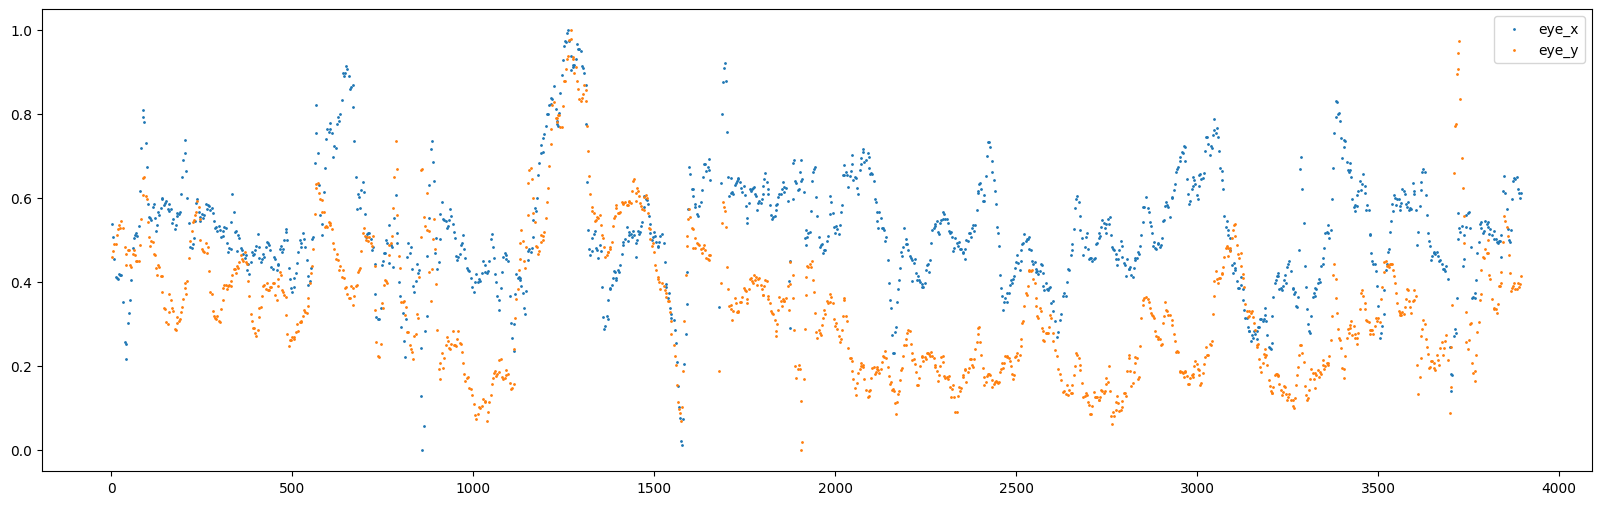

In [33]:
scaler = MinMaxScaler()

sdf = df[['eye_x', 'eye_y', 'median_motion']]

scaler.fit(sdf)

sdf = pd.DataFrame(scaler.transform(sdf), columns=sdf.columns)

sdf['frame_index'] = df['frame_index']

plt.figure(figsize=(20,6))
plt.scatter(sdf['frame_index'], sdf['eye_x'], s=1, label='eye_x')
plt.scatter(sdf['frame_index'], sdf['eye_y'], s=1, label='eye_y')
#plt.scatter(sdf['frame_index'], sdf['blur'], s=1, label='blur')
#plt.scatter(sdf['frame_index'], sdf['median_motion'], s=1, label='median_motion')
plt.legend()